In [1]:
!pip install fastai==2.7.9
!pip install fastkaggle==0.0.7
!pip install fasterai==0.1.11
!pip install ipython-autotime==0.3.1
!pip install torch==1.12.1
%load_ext autotime

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: pynvml
    Found existing installation: pynvml 11.5.0
    Uninstalling pynvml-11.5.0:
      Successfully uninstalled pynvml-11.5.0
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.5/225.5 kB 4.9 MB/s eta 0:00:0000:01
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.11
    Uninstalling fastai-2.7.11:
      Successfully uninstalled fastai-2.7.11
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo

In [5]:
from fastai.vision.all import *
from fastai.callback.all import *
from fastai.data.all import *
from fastai.imports import *
from fastai.torch_core import *
from fastai.learner import *
from fastai.fp16_utils import *

from fasterai.sparse.all import *
from fasterai.core.criteria import *
from fasterai.regularize.all import *

from fastkaggle import *

import torch
import torch.nn as nn
import torch.nn.functional as F


set_seed(42)

time: 11.6 s (started: 2023-04-09 12:42:57 +00:00)


In [8]:
@patch
def custom_plot_losses(self: Recorder, skip_start=5, with_valid=True, filename="temp.txt"):
    fig2 = plt.figure("Figure 2")

    idx = (np.array(self.iters)<skip_start).sum()
    train_col = self.metric_names.index('train_loss') - 1 
    plt.plot(self.iters[idx:], L(self.values[idx:]).itemgot(train_col), label='train loss')
    plt.legend()
    if with_valid:
        idx = (np.array(self.iters)<skip_start).sum()
        valid_col = self.metric_names.index('valid_loss') - 1 
        plt.plot(self.iters[idx:], L(self.values[idx:]).itemgot(valid_col), label='valid loss')
        plt.legend()

    
@patch
def custom_plot_values(self: Recorder, skip_start=5, with_valid=True):
    fig3 = plt.figure("Figure 3")
    
    idx = (np.array(self.iters)<skip_start).sum()
    train_col = self.metric_names.index('train_accuracy') - 1 
    plt.plot(self.iters[idx:], L(self.values[idx:]).itemgot(train_col), label='train accuracy')

    plt.legend()
    if with_valid:
        idx = (np.array(self.iters)<skip_start).sum()
        valid_col = self.metric_names.index('valid_accuracy') - 1 
        plt.plot(self.iters[idx:], L(self.values[idx:]).itemgot(valid_col), label='valid accuracy')
        plt.legend()


time: 4 ms (started: 2023-04-09 12:43:09 +00:00)


In [9]:
comp = 'paddy-diseases/paddy-diseases'

path = setup_comp(comp, install='"fastcore>=1.4.5" "fastai>=2.7.1" "timm>=0.6.2.dev0"')

time: 4min 54s (started: 2023-04-09 12:43:09 +00:00)


In [10]:
dls = ImageDataLoaders.from_folder(path/"train", 
                                   valid_pct=0.25, 
                                   item_tfms=Resize(256), 
                                   batch_tfms=aug_transforms(   size=64, 
                                                                min_scale=0.75,
                                                                max_rotate=10., 
                                                                min_zoom=0.8, 
                                                                max_zoom=1.2, 
                                                            
                                                            ), 
                                   bs=32)

time: 14 s (started: 2023-04-09 12:48:03 +00:00)


In [11]:
sp_cb=[
#       GradientAccumulation(32), 
      SparsifyCallback(sparsity=12.5, 
                         granularity='filter', 
                         context='local', 
                         criteria=large_final, 
                         schedule=one_cycle),


]

time: 3.39 ms (started: 2023-04-09 12:48:17 +00:00)


In [12]:
model = vgg16_bn(num_classes=10)


time: 2.06 s (started: 2023-04-09 12:48:17 +00:00)


In [13]:
learn = Learner(dls, 
                model, 
                metrics=[accuracy,
                         error_rate,
                        ])
learn.unfreeze()
learn.recorder.train_metrics = True
learn.path = Path("/kaggle/working/")

time: 7.89 ms (started: 2023-04-09 12:48:19 +00:00)


Pruning of filter until a sparsity of [12.5]%
Saving Weights at epoch 0


epoch,train_loss,train_accuracy,train_error_rate,valid_loss,valid_accuracy,valid_error_rate,time
0,2.241026,0.186378,0.813622,2.065514,0.273077,0.726923,01:34
1,2.124991,0.223878,0.776122,2.024697,0.271635,0.728365,01:13
2,2.105699,0.251282,0.748718,1.983743,0.298558,0.701442,01:14
3,2.058238,0.255288,0.744712,1.968700,0.301442,0.698558,01:14
4,2.019288,0.282853,0.717147,1.896848,0.342308,0.657692,01:14
5,1.966191,0.300801,0.699199,1.857364,0.350000,0.650000,01:14
6,1.926934,0.319872,0.680128,1.791159,0.402404,0.597596,01:14
7,1.880128,0.325321,0.674679,1.731718,0.397115,0.602885,01:13
8,1.837101,0.354167,0.645833,1.682974,0.434135,0.565865,01:13
9,1.815193,0.370833,0.629167,1.621836,0.439904,0.560096,01:14


Sparsity at the end of epoch 0: [0.04]%
Sparsity at the end of epoch 1: [0.04]%
Sparsity at the end of epoch 2: [0.05]%
Sparsity at the end of epoch 3: [0.05]%
Sparsity at the end of epoch 4: [0.06]%
Sparsity at the end of epoch 5: [0.07]%
Sparsity at the end of epoch 6: [0.08]%
Sparsity at the end of epoch 7: [0.09]%
Sparsity at the end of epoch 8: [0.11]%
Sparsity at the end of epoch 9: [0.12]%
Sparsity at the end of epoch 10: [0.14]%
Sparsity at the end of epoch 11: [0.16]%
Sparsity at the end of epoch 12: [0.19]%
Sparsity at the end of epoch 13: [0.22]%
Sparsity at the end of epoch 14: [0.25]%
Sparsity at the end of epoch 15: [0.28]%
Sparsity at the end of epoch 16: [0.33]%
Sparsity at the end of epoch 17: [0.37]%
Sparsity at the end of epoch 18: [0.43]%
Sparsity at the end of epoch 19: [0.49]%
Sparsity at the end of epoch 20: [0.56]%
Sparsity at the end of epoch 21: [0.64]%
Sparsity at the end of epoch 22: [0.73]%
Sparsity at the end of epoch 23: [0.83]%
Sparsity at the end of epo

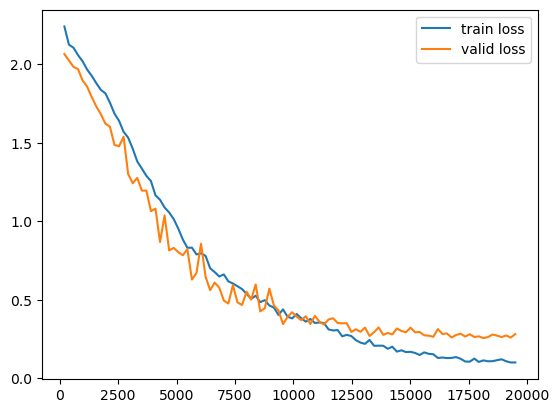

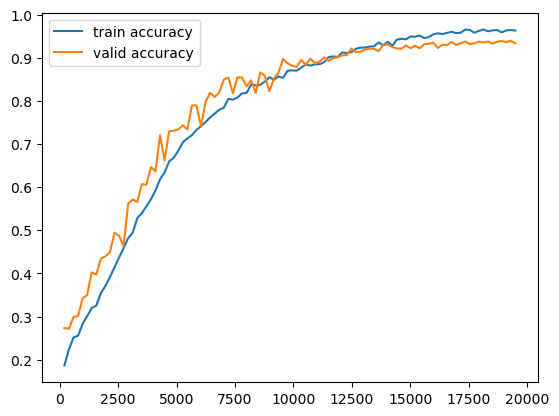

time: 2h 6min 56s (started: 2023-04-09 12:48:23 +00:00)


In [18]:
learn.fit_one_cycle(100, 3e-5, cbs=sp_cb)
                    
learn.recorder.custom_plot_losses()
learn.recorder.custom_plot_values()

In [35]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

time: 724 µs (started: 2023-04-09 15:10:05 +00:00)


In [36]:
count_parameters(learn.model)


134309962

time: 6.75 ms (started: 2023-04-09 15:10:05 +00:00)


In [37]:
pruner = Pruner()
pruned_model = pruner.prune_model(learn.model)

time: 56.8 ms (started: 2023-04-09 15:10:05 +00:00)


In [38]:
pruned_learn = Learner(dls, pruned_model.cuda(), metrics=accuracy)


time: 3.66 ms (started: 2023-04-09 15:10:05 +00:00)


In [39]:
pruned_learn.validate()

(#2) [0.281086266040802,0.9341346025466919]

time: 18.6 s (started: 2023-04-09 15:10:05 +00:00)


In [40]:
count_parameters(pruned_learn)

118015746

time: 4.4 ms (started: 2023-04-09 15:10:23 +00:00)


In [41]:
pruned_learn.export(Path("/kaggle/working/VGG16_bn_sparse12,5_pruned.pkl"))

time: 1.35 s (started: 2023-04-09 15:10:23 +00:00)
